# Home Credit Default Risk

In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ファイルの読み込み
path = "/Users/owner/GCI/Final_Assignment/"

df = pd.read_csv(path + 'application_train.csv')
df_test = pd.read_csv(path + 'application_test.csv')

In [3]:
#トレーニングデータのサイズ
print('Training data shape: ', df.shape)
df.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#欠損値の確認
df.isnull().sum().head(15)

SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              12
AMT_GOODS_PRICE         278
NAME_TYPE_SUITE        1292
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
dtype: int64

In [5]:
df['CREDIT PER PRICE'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df = df.dropna(subset=['CREDIT PER PRICE'])
df['CREDIT PER PRICE'].isnull().sum()

0

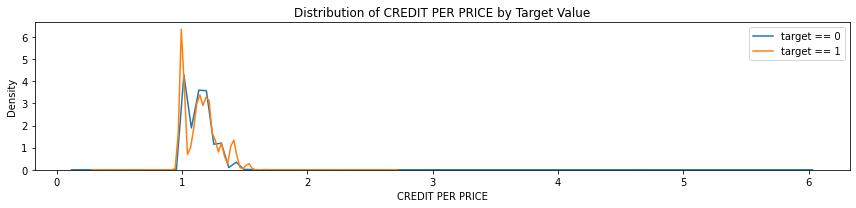

In [6]:
plt.figure(figsize = (12, 3))

sns.kdeplot(df.loc[df['TARGET'] == 0, 'CREDIT PER PRICE'], label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'CREDIT PER PRICE'], label = 'target == 1')

plt.title('Distribution of CREDIT PER PRICE by Target Value')
plt.xlabel('CREDIT PER PRICE'); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

In [7]:
df['CREDIT PER ANNUITY'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
df = df.dropna(subset=['CREDIT PER ANNUITY'])
df['CREDIT PER ANNUITY'].isnull().sum()

0

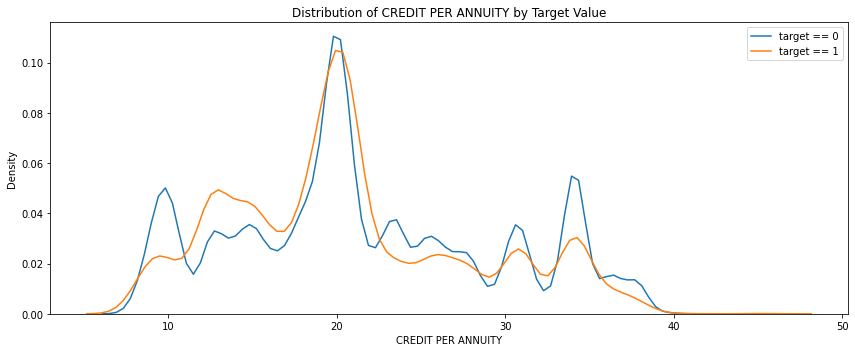

In [8]:
plt.figure(figsize = (12, 5))

sns.kdeplot(df.loc[df['TARGET'] == 0, 'CREDIT PER ANNUITY'], label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'CREDIT PER ANNUITY'], label = 'target == 1')

plt.title('Distribution of CREDIT PER ANNUITY by Target Value')
plt.xlabel('CREDIT PER ANNUITY'); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

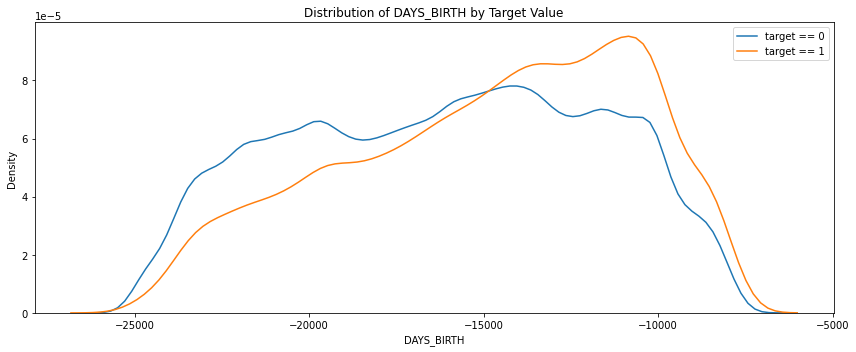

In [9]:
plt.figure(figsize = (12, 5))

sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'], label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'], label = 'target == 1')

plt.title('Distribution of DAYS_BIRTH by Target Value')
plt.xlabel('DAYS_BIRTH'); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

In [10]:
df_0 = df[df['TARGET'] == 0]
df_1 = df[df['TARGET'] == 1]

In [11]:
#利益 = 返済額 - 住宅価格
df_0['margin'] = df_0['AMT_CREDIT'] - df_0['AMT_GOODS_PRICE']
profit = df_0['margin'].sum()
print(profit)

17002447452.0


In [12]:
#デフォルトコスト
loss = df_1['AMT_CREDIT'].sum()
print(loss)

13841609449.5


In [13]:
#収益
gain = profit - loss
print(gain)

3160838002.5


In [14]:
#一人当たり収益
print(gain / df.shape[0])

10288.482891794507


In [15]:
#顧客数
df.shape[0]

307221

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

#Columnごとに繰り返し
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            df_test[col] = le.transform(df_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

In [17]:
#異常値のフラグ
df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243
#異常値をnanで置き換え
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [18]:
#特徴量作成
df['RATE_CREDIT'] = df['AMT_CREDIT'].div(df.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT'] = df_test['AMT_CREDIT'].div(df_test.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].transform('mean'))

df['RATE_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].div(df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))
df_test['RATE_INCOME_TOTAL'] = df_test['AMT_INCOME_TOTAL'].div(df_test.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))

df['RATE_CREDIT_HOUSING'] = df['AMT_CREDIT'].div(df.groupby('NAME_HOUSING_TYPE')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT_HOUSING'] = df_test['AMT_CREDIT'].div(df_test.groupby('NAME_HOUSING_TYPE')['AMT_CREDIT'].transform('mean'))

df['RATE_INCOME_ORGANIZATION'] = df['AMT_INCOME_TOTAL'].div(df.groupby('ORGANIZATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))
df_test['RATE_INCOME_ORGANIZATION'] = df_test['AMT_INCOME_TOTAL'].div(df_test.groupby('ORGANIZATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))

df['RATE_REGION_SUITE'] = df['REGION_RATING_CLIENT'].div(df.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT'].transform('mean'))
df_test['RATE_REGION_SUITE'] = df_test['REGION_RATING_CLIENT'].div(df_test.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT'].transform('mean'))

df['RATE_REGION_W_CITY_SUITE'] = df['REGION_RATING_CLIENT_W_CITY'].div(df.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT_W_CITY'].transform('mean'))
df_test['RATE_REGION_W_CITY_SUITE'] = df_test['REGION_RATING_CLIENT_W_CITY'].div(df_test.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT_W_CITY'].transform('mean'))

df['RATE_CREDIT_FAMILY'] = df['AMT_CREDIT'].div(df.groupby('NAME_FAMILY_STATUS')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT_FAMILY'] = df_test['AMT_CREDIT'].div(df_test.groupby('NAME_FAMILY_STATUS')['AMT_CREDIT'].transform('mean'))

df['RATE_CREDIT_CONTRACT'] = df['AMT_CREDIT'].div(df.groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT_CONTRACT'] = df_test['AMT_CREDIT'].div(df_test.groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].transform('mean'))

df['RATE_INCOME_CONTRACT'] = df['AMT_INCOME_TOTAL'].div(df.groupby('NAME_CONTRACT_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))
df_test['RATE_INCOME_CONTRACT'] = df_test['AMT_INCOME_TOTAL'].div(df_test.groupby('NAME_CONTRACT_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))



df['INCOME_PER_FAMILY'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df_test['INCOME_PER_FAMILY'] = df_test['AMT_INCOME_TOTAL'] / df_test['CNT_FAM_MEMBERS']

df['CREDIT_PER_INCOME'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df_test['CREDIT_PER_INCOME'] = df_test['AMT_CREDIT'] / df_test['AMT_INCOME_TOTAL']

df['EXT_SOURCE_1 PER DAYS_BIRTH'] = df['EXT_SOURCE_1'] / df['DAYS_BIRTH']
df_test['EXT_SOURCE_1 PER DAYS_BIRTH'] = df_test['EXT_SOURCE_1'] / df_test['DAYS_BIRTH']

df['REGION_RATING_CLIENT PER REGION_POPULATION_RELATIVE'] = df['REGION_RATING_CLIENT'] / df['REGION_POPULATION_RELATIVE']
df_test['REGION_RATING_CLIENT PER REGION_POPULATION_RELATIVE'] = df_test['REGION_RATING_CLIENT'] / df_test['REGION_POPULATION_RELATIVE']

df['EXT_SOURCE_1 PER DAYS_BIRTH'] = df['EXT_SOURCE_1'] / df['DAYS_BIRTH']
df_test['EXT_SOURCE_1 PER DAYS_BIRTH'] = df_test['EXT_SOURCE_1'] / df_test['DAYS_BIRTH']

df['C G'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df_test['C G'] = df_test['AMT_CREDIT'] / df_test['AMT_GOODS_PRICE']
df['A G'] = df['AMT_ANNUITY'] / df['AMT_GOODS_PRICE']
df_test['A G'] = df_test['AMT_ANNUITY'] / df_test['AMT_GOODS_PRICE']

df['DAYS_REGISTRATION / DAYS_BIRTH'] = df['DAYS_REGISTRATION'] / df['DAYS_BIRTH']
df_test['DAYS_REGISTRATION / DAYS_BIRTH'] = df_test['DAYS_REGISTRATION'] / df_test['DAYS_BIRTH']

df['OWN_CAR_AGE / DAYS_BIRTH'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
df_test['OWN_CAR_AGE / DAYS_BIRTH'] = df_test['OWN_CAR_AGE'] / df_test['DAYS_BIRTH']

df['CNT_CHILDREN / CNT_FAM_MEMBERS'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']
df_test['CNT_CHILDREN / CNT_FAM_MEMBERS'] = df_test['CNT_CHILDREN'] / df_test['CNT_FAM_MEMBERS']

df['DAYS_ID_PUBLISH / DAYS_BIRTH'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
df_test['DAYS_ID_PUBLISH / DAYS_BIRTH'] = df_test['DAYS_ID_PUBLISH'] / df_test['DAYS_BIRTH']

df['EXT_SOURCE_1 DAYS_EMPLOYED'] = df['EXT_SOURCE_1'] * df['DAYS_EMPLOYED']
df_test['EXT_SOURCE_1 DAYS_EMPLOYED'] = df_test['EXT_SOURCE_1'] * df_test['DAYS_EMPLOYED']

df['CNT_CHILDREN / DAYS_EMPLOYED'] = df['CNT_CHILDREN'] / df['DAYS_EMPLOYED']
df_test['CNT_CHILDREN / DAYS_EMPLOYED'] = df_test['CNT_CHILDREN'] / df_test['DAYS_EMPLOYED']

df['DAYS_EMPLOYED REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY'] = df['DAYS_EMPLOYED'] * df['REG_CITY_NOT_LIVE_CITY'] * df['REG_CITY_NOT_WORK_CITY']
df_test['DAYS_EMPLOYED REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY'] = df_test['DAYS_EMPLOYED'] * df_test['REG_CITY_NOT_LIVE_CITY'] * df_test['REG_CITY_NOT_WORK_CITY']

df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df_test['DAYS_EMPLOYED_PERCENT'] = df_test['DAYS_EMPLOYED'] / df_test['DAYS_BIRTH']


df['EXT_SOURCE_1 FLAG_EMP_PHONE'] = df['EXT_SOURCE_1'] * df['FLAG_EMP_PHONE']
df_test['EXT_SOURCE_1 FLAG_EMP_PHONE'] = df_test['EXT_SOURCE_1'] * df_test['FLAG_EMP_PHONE']

df['EXT_SOURCE_2 REGION_RATING_CLIENT'] = df['EXT_SOURCE_2'] * df['REGION_RATING_CLIENT']
df_test['EXT_SOURCE_2 REGION_RATING_CLIENT'] = df_test['EXT_SOURCE_2'] * df_test['REGION_RATING_CLIENT']

df['EXT_SOURCE_1 DAYS_LAST_PHONE_CHANGE'] = df['EXT_SOURCE_1'] * df['DAYS_LAST_PHONE_CHANGE']
df_test['EXT_SOURCE_1 DAYS_LAST_PHONE_CHANGE'] = df_test['EXT_SOURCE_1'] * df_test['DAYS_LAST_PHONE_CHANGE']

df['EXT_SOURCE_2 DAYS_LAST_PHONE_CHANGE'] = df['EXT_SOURCE_2'] * df['DAYS_LAST_PHONE_CHANGE']
df_test['EXT_SOURCE_2 DAYS_LAST_PHONE_CHANGE'] = df_test['EXT_SOURCE_2'] * df_test['DAYS_LAST_PHONE_CHANGE']


df['EXT_SOURCE_2 PER REGION_RATING_CLIENT'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT']
df_test['EXT_SOURCE_2 PER REGION_RATING_CLIENT'] = df_test['EXT_SOURCE_2'] / df_test['REGION_RATING_CLIENT']

df['EXT_SOURCE_2 PER DAYS_LAST_PHONE_CHANGE'] = df['EXT_SOURCE_2'] / df['DAYS_LAST_PHONE_CHANGE']
df_test['EXT_SOURCE_2 PER DAYS_LAST_PHONE_CHANGE'] = df_test['EXT_SOURCE_2'] / df_test['DAYS_LAST_PHONE_CHANGE']

df['ANNUITY_PER_INCOME'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df_test['ANNUITY_PER_INCOME'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']

df['EXT_SOURCE_2 EXT_SOURCE_3'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
df_test['EXT_SOURCE_2 EXT_SOURCE_3'] = df_test['EXT_SOURCE_2'] * df_test['EXT_SOURCE_3']

df['EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3'] * df['DAYS_BIRTH']
df_test['EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH'] = df_test['EXT_SOURCE_2'] * df_test['EXT_SOURCE_3'] * df_test['DAYS_BIRTH']

df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df_test['PAYMENT_RATE'] = df_test['AMT_ANNUITY'] / df_test['AMT_CREDIT']

In [19]:
#カテゴリカル変数をOneHotEncoding
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [20]:
train_labels = df['TARGET']

#トレーニング/テストデータのアライン
df, df_test = df.align(df_test, join = 'inner', axis = 1)

#ターゲットを元に戻す
df['TARGET'] = train_labels

In [21]:
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]
df_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_test.columns]

In [22]:
#機械学習ライブラリのインポート
from sklearn.model_selection import KFold
import lightgbm as lgb
import optuna

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

X, X_test, y, y_test = train_test_split(X, y)

[1]	valid_0's auc: 0.701695
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.707142
[3]	valid_0's auc: 0.708902
[4]	valid_0's auc: 0.710073
[5]	valid_0's auc: 0.710891
[6]	valid_0's auc: 0.712004
[7]	valid_0's auc: 0.713897
[8]	valid_0's auc: 0.714767
[9]	valid_0's auc: 0.715173
[10]	valid_0's auc: 0.716011
[11]	valid_0's auc: 0.716771
[12]	valid_0's auc: 0.717089
[13]	valid_0's auc: 0.717395
[14]	valid_0's auc: 0.718402
[15]	valid_0's auc: 0.718874
[16]	valid_0's auc: 0.720528
[17]	valid_0's auc: 0.720857
[18]	valid_0's auc: 0.721183
[19]	valid_0's auc: 0.721995
[20]	valid_0's auc: 0.722777
[21]	valid_0's auc: 0.723081
[22]	valid_0's auc: 0.723518
[23]	valid_0's auc: 0.723758
[24]	valid_0's auc: 0.724152
[25]	valid_0's auc: 0.724643
[26]	valid_0's auc: 0.725474
[27]	valid_0's auc: 0.72582
[28]	valid_0's auc: 0.726195
[29]	valid_0's auc: 0.726442
[30]	valid_0's auc: 0.726789
[31]	valid_0's auc: 0.727356
[32]	valid_0's auc: 0.72777
[33]	valid_0's auc: 0

[276]	valid_0's auc: 0.758903
[277]	valid_0's auc: 0.75888
[278]	valid_0's auc: 0.758924
[279]	valid_0's auc: 0.758907
[280]	valid_0's auc: 0.758921
[281]	valid_0's auc: 0.758928
[282]	valid_0's auc: 0.758906
[283]	valid_0's auc: 0.758914
[284]	valid_0's auc: 0.758933
[285]	valid_0's auc: 0.758934
[286]	valid_0's auc: 0.758904
[287]	valid_0's auc: 0.758925
[288]	valid_0's auc: 0.758912
[289]	valid_0's auc: 0.758951
[290]	valid_0's auc: 0.758936
[291]	valid_0's auc: 0.75894
[292]	valid_0's auc: 0.758982
[293]	valid_0's auc: 0.758997
[294]	valid_0's auc: 0.759007
[295]	valid_0's auc: 0.759015
[296]	valid_0's auc: 0.759045
[297]	valid_0's auc: 0.759014
[298]	valid_0's auc: 0.759056
[299]	valid_0's auc: 0.759045
[300]	valid_0's auc: 0.759141
[301]	valid_0's auc: 0.759142
[302]	valid_0's auc: 0.759137
[303]	valid_0's auc: 0.759115
[304]	valid_0's auc: 0.759109
[305]	valid_0's auc: 0.759281
[306]	valid_0's auc: 0.759288
[307]	valid_0's auc: 0.759312
[308]	valid_0's auc: 0.759308
[309]	valid_

[549]	valid_0's auc: 0.760918
[550]	valid_0's auc: 0.760932
[551]	valid_0's auc: 0.760914
[552]	valid_0's auc: 0.760895
[553]	valid_0's auc: 0.760904
[554]	valid_0's auc: 0.760902
[555]	valid_0's auc: 0.760882
[556]	valid_0's auc: 0.760843
[557]	valid_0's auc: 0.760809
[558]	valid_0's auc: 0.7608
[559]	valid_0's auc: 0.760794
[560]	valid_0's auc: 0.760768
[561]	valid_0's auc: 0.760768
[562]	valid_0's auc: 0.76077
[563]	valid_0's auc: 0.76081
[564]	valid_0's auc: 0.760849
[565]	valid_0's auc: 0.760837
[566]	valid_0's auc: 0.760897
[567]	valid_0's auc: 0.7609
[568]	valid_0's auc: 0.760914
[569]	valid_0's auc: 0.760924
[570]	valid_0's auc: 0.760889
[571]	valid_0's auc: 0.760873
[572]	valid_0's auc: 0.760876
[573]	valid_0's auc: 0.760873
[574]	valid_0's auc: 0.760854
[575]	valid_0's auc: 0.76086
[576]	valid_0's auc: 0.76086
[577]	valid_0's auc: 0.760886
[578]	valid_0's auc: 0.760885
[579]	valid_0's auc: 0.760838
[580]	valid_0's auc: 0.760845
[581]	valid_0's auc: 0.760824
[582]	valid_0's au

[823]	valid_0's auc: 0.761377
[824]	valid_0's auc: 0.76139
[825]	valid_0's auc: 0.761358
[826]	valid_0's auc: 0.761341
[827]	valid_0's auc: 0.761342
[828]	valid_0's auc: 0.761329
[829]	valid_0's auc: 0.7613
[830]	valid_0's auc: 0.761271
[831]	valid_0's auc: 0.761248
[832]	valid_0's auc: 0.761266
[833]	valid_0's auc: 0.761243
[834]	valid_0's auc: 0.761245
[835]	valid_0's auc: 0.76125
[836]	valid_0's auc: 0.761271
[837]	valid_0's auc: 0.761275
[838]	valid_0's auc: 0.761275
[839]	valid_0's auc: 0.76129
[840]	valid_0's auc: 0.761269
[841]	valid_0's auc: 0.761287
[842]	valid_0's auc: 0.76129
[843]	valid_0's auc: 0.761287
[844]	valid_0's auc: 0.761296
[845]	valid_0's auc: 0.761296
[846]	valid_0's auc: 0.761292
[847]	valid_0's auc: 0.761302
[848]	valid_0's auc: 0.761277
[849]	valid_0's auc: 0.761249
[850]	valid_0's auc: 0.761254
[851]	valid_0's auc: 0.761254
[852]	valid_0's auc: 0.761239
[853]	valid_0's auc: 0.761241
[854]	valid_0's auc: 0.761239
[855]	valid_0's auc: 0.761221
[856]	valid_0's 

[79]	valid_0's auc: 0.755136
[80]	valid_0's auc: 0.755256
[81]	valid_0's auc: 0.755345
[82]	valid_0's auc: 0.755569
[83]	valid_0's auc: 0.755754
[84]	valid_0's auc: 0.755898
[85]	valid_0's auc: 0.75606
[86]	valid_0's auc: 0.756201
[87]	valid_0's auc: 0.75643
[88]	valid_0's auc: 0.756622
[89]	valid_0's auc: 0.75679
[90]	valid_0's auc: 0.756907
[91]	valid_0's auc: 0.756989
[92]	valid_0's auc: 0.757066
[93]	valid_0's auc: 0.757273
[94]	valid_0's auc: 0.757343
[95]	valid_0's auc: 0.757419
[96]	valid_0's auc: 0.757639
[97]	valid_0's auc: 0.757759
[98]	valid_0's auc: 0.757892
[99]	valid_0's auc: 0.757955
[100]	valid_0's auc: 0.758033
[101]	valid_0's auc: 0.758121
[102]	valid_0's auc: 0.758202
[103]	valid_0's auc: 0.758286
[104]	valid_0's auc: 0.758389
[105]	valid_0's auc: 0.758475
[106]	valid_0's auc: 0.758497
[107]	valid_0's auc: 0.758549
[108]	valid_0's auc: 0.758541
[109]	valid_0's auc: 0.758803
[110]	valid_0's auc: 0.758949
[111]	valid_0's auc: 0.759031
[112]	valid_0's auc: 0.759014
[113

[353]	valid_0's auc: 0.764409
[354]	valid_0's auc: 0.764429
[355]	valid_0's auc: 0.764434
[356]	valid_0's auc: 0.764454
[357]	valid_0's auc: 0.764506
[358]	valid_0's auc: 0.764511
[359]	valid_0's auc: 0.764528
[360]	valid_0's auc: 0.7646
[361]	valid_0's auc: 0.764586
[362]	valid_0's auc: 0.764594
[363]	valid_0's auc: 0.764612
[364]	valid_0's auc: 0.764599
[365]	valid_0's auc: 0.764591
[366]	valid_0's auc: 0.764622
[367]	valid_0's auc: 0.764625
[368]	valid_0's auc: 0.764607
[369]	valid_0's auc: 0.76462
[370]	valid_0's auc: 0.764612
[371]	valid_0's auc: 0.764624
[372]	valid_0's auc: 0.764613
[373]	valid_0's auc: 0.764615
[374]	valid_0's auc: 0.764621
[375]	valid_0's auc: 0.764604
[376]	valid_0's auc: 0.764601
[377]	valid_0's auc: 0.764616
[378]	valid_0's auc: 0.764609
[379]	valid_0's auc: 0.76462
[380]	valid_0's auc: 0.764643
[381]	valid_0's auc: 0.764661
[382]	valid_0's auc: 0.764694
[383]	valid_0's auc: 0.764703
[384]	valid_0's auc: 0.764767
[385]	valid_0's auc: 0.764767
[386]	valid_0'

[627]	valid_0's auc: 0.765278
[628]	valid_0's auc: 0.765273
[629]	valid_0's auc: 0.765275
[630]	valid_0's auc: 0.765275
[631]	valid_0's auc: 0.765272
[632]	valid_0's auc: 0.765273
[633]	valid_0's auc: 0.765253
[634]	valid_0's auc: 0.765249
[635]	valid_0's auc: 0.765261
[636]	valid_0's auc: 0.765264
[637]	valid_0's auc: 0.765244
[638]	valid_0's auc: 0.765219
[639]	valid_0's auc: 0.765247
[640]	valid_0's auc: 0.765234
[641]	valid_0's auc: 0.76523
[642]	valid_0's auc: 0.76527
[643]	valid_0's auc: 0.765234
[644]	valid_0's auc: 0.765225
[645]	valid_0's auc: 0.765221
[646]	valid_0's auc: 0.765218
[647]	valid_0's auc: 0.765211
[648]	valid_0's auc: 0.765223
[649]	valid_0's auc: 0.765217
[650]	valid_0's auc: 0.765282
[651]	valid_0's auc: 0.765297
[652]	valid_0's auc: 0.765299
[653]	valid_0's auc: 0.765307
[654]	valid_0's auc: 0.765277
[655]	valid_0's auc: 0.765276
[656]	valid_0's auc: 0.76528
[657]	valid_0's auc: 0.765277
[658]	valid_0's auc: 0.765284
[659]	valid_0's auc: 0.76531
[660]	valid_0'

[89]	valid_0's auc: 0.757192
[90]	valid_0's auc: 0.757323
[91]	valid_0's auc: 0.75745
[92]	valid_0's auc: 0.757635
[93]	valid_0's auc: 0.757831
[94]	valid_0's auc: 0.757976
[95]	valid_0's auc: 0.758149
[96]	valid_0's auc: 0.758323
[97]	valid_0's auc: 0.758665
[98]	valid_0's auc: 0.758768
[99]	valid_0's auc: 0.758966
[100]	valid_0's auc: 0.759028
[101]	valid_0's auc: 0.759166
[102]	valid_0's auc: 0.759237
[103]	valid_0's auc: 0.759329
[104]	valid_0's auc: 0.759477
[105]	valid_0's auc: 0.759553
[106]	valid_0's auc: 0.759708
[107]	valid_0's auc: 0.759811
[108]	valid_0's auc: 0.759887
[109]	valid_0's auc: 0.760047
[110]	valid_0's auc: 0.760255
[111]	valid_0's auc: 0.760404
[112]	valid_0's auc: 0.760524
[113]	valid_0's auc: 0.760583
[114]	valid_0's auc: 0.760628
[115]	valid_0's auc: 0.760767
[116]	valid_0's auc: 0.760878
[117]	valid_0's auc: 0.760962
[118]	valid_0's auc: 0.761031
[119]	valid_0's auc: 0.761135
[120]	valid_0's auc: 0.761201
[121]	valid_0's auc: 0.761293
[122]	valid_0's auc: 0

[363]	valid_0's auc: 0.76917
[364]	valid_0's auc: 0.76924
[365]	valid_0's auc: 0.769275
[366]	valid_0's auc: 0.769279
[367]	valid_0's auc: 0.769275
[368]	valid_0's auc: 0.769269
[369]	valid_0's auc: 0.769278
[370]	valid_0's auc: 0.769296
[371]	valid_0's auc: 0.769284
[372]	valid_0's auc: 0.769271
[373]	valid_0's auc: 0.76927
[374]	valid_0's auc: 0.769256
[375]	valid_0's auc: 0.769256
[376]	valid_0's auc: 0.769277
[377]	valid_0's auc: 0.769281
[378]	valid_0's auc: 0.769268
[379]	valid_0's auc: 0.769268
[380]	valid_0's auc: 0.769287
[381]	valid_0's auc: 0.769282
[382]	valid_0's auc: 0.769356
[383]	valid_0's auc: 0.769407
[384]	valid_0's auc: 0.769432
[385]	valid_0's auc: 0.769361
[386]	valid_0's auc: 0.769381
[387]	valid_0's auc: 0.769362
[388]	valid_0's auc: 0.769365
[389]	valid_0's auc: 0.769384
[390]	valid_0's auc: 0.769405
[391]	valid_0's auc: 0.769383
[392]	valid_0's auc: 0.769353
[393]	valid_0's auc: 0.769336
[394]	valid_0's auc: 0.769332
[395]	valid_0's auc: 0.769337
[396]	valid_0

[637]	valid_0's auc: 0.771149
[638]	valid_0's auc: 0.771137
[639]	valid_0's auc: 0.771137
[640]	valid_0's auc: 0.771128
[641]	valid_0's auc: 0.771154
[642]	valid_0's auc: 0.771136
[643]	valid_0's auc: 0.771147
[644]	valid_0's auc: 0.771098
[645]	valid_0's auc: 0.771101
[646]	valid_0's auc: 0.77113
[647]	valid_0's auc: 0.77112
[648]	valid_0's auc: 0.771128
[649]	valid_0's auc: 0.771111
[650]	valid_0's auc: 0.771118
[651]	valid_0's auc: 0.771116
[652]	valid_0's auc: 0.771113
[653]	valid_0's auc: 0.771103
[654]	valid_0's auc: 0.771081
[655]	valid_0's auc: 0.771106
[656]	valid_0's auc: 0.771095
[657]	valid_0's auc: 0.771092
[658]	valid_0's auc: 0.771073
[659]	valid_0's auc: 0.771035
[660]	valid_0's auc: 0.771031
[661]	valid_0's auc: 0.771032
[662]	valid_0's auc: 0.771026
[663]	valid_0's auc: 0.771017
[664]	valid_0's auc: 0.771077
[665]	valid_0's auc: 0.771059
[666]	valid_0's auc: 0.771036
[667]	valid_0's auc: 0.771052
[668]	valid_0's auc: 0.77105
[669]	valid_0's auc: 0.77105
[670]	valid_0'

[911]	valid_0's auc: 0.771495
[912]	valid_0's auc: 0.771481
[913]	valid_0's auc: 0.771501
[914]	valid_0's auc: 0.771494
[915]	valid_0's auc: 0.77147
[916]	valid_0's auc: 0.77148
[917]	valid_0's auc: 0.771521
[918]	valid_0's auc: 0.771566
[919]	valid_0's auc: 0.771566
[920]	valid_0's auc: 0.771551
[921]	valid_0's auc: 0.77155
[922]	valid_0's auc: 0.771538
[923]	valid_0's auc: 0.771521
[924]	valid_0's auc: 0.771538
[925]	valid_0's auc: 0.771526
[926]	valid_0's auc: 0.77151
[927]	valid_0's auc: 0.77148
[928]	valid_0's auc: 0.771481
[929]	valid_0's auc: 0.771477
[930]	valid_0's auc: 0.77145
[931]	valid_0's auc: 0.771451
[932]	valid_0's auc: 0.771439
[933]	valid_0's auc: 0.771411
[934]	valid_0's auc: 0.771448
[935]	valid_0's auc: 0.771438
[936]	valid_0's auc: 0.771445
[937]	valid_0's auc: 0.77145
[938]	valid_0's auc: 0.771451
[939]	valid_0's auc: 0.771459
[940]	valid_0's auc: 0.771464
[941]	valid_0's auc: 0.771464
[942]	valid_0's auc: 0.771422
[943]	valid_0's auc: 0.771387
[944]	valid_0's a

[159]	valid_0's auc: 0.763233
[160]	valid_0's auc: 0.763243
[161]	valid_0's auc: 0.76332
[162]	valid_0's auc: 0.763361
[163]	valid_0's auc: 0.763446
[164]	valid_0's auc: 0.76364
[165]	valid_0's auc: 0.763701
[166]	valid_0's auc: 0.763747
[167]	valid_0's auc: 0.763784
[168]	valid_0's auc: 0.763835
[169]	valid_0's auc: 0.76387
[170]	valid_0's auc: 0.763912
[171]	valid_0's auc: 0.763974
[172]	valid_0's auc: 0.764006
[173]	valid_0's auc: 0.764027
[174]	valid_0's auc: 0.764056
[175]	valid_0's auc: 0.764076
[176]	valid_0's auc: 0.764274
[177]	valid_0's auc: 0.76431
[178]	valid_0's auc: 0.764377
[179]	valid_0's auc: 0.764427
[180]	valid_0's auc: 0.764483
[181]	valid_0's auc: 0.764452
[182]	valid_0's auc: 0.764485
[183]	valid_0's auc: 0.764534
[184]	valid_0's auc: 0.764587
[185]	valid_0's auc: 0.764613
[186]	valid_0's auc: 0.764655
[187]	valid_0's auc: 0.764743
[188]	valid_0's auc: 0.76476
[189]	valid_0's auc: 0.764818
[190]	valid_0's auc: 0.764798
[191]	valid_0's auc: 0.764815
[192]	valid_0's

[433]	valid_0's auc: 0.768657
[434]	valid_0's auc: 0.768655
[435]	valid_0's auc: 0.768698
[436]	valid_0's auc: 0.768687
[437]	valid_0's auc: 0.768693
[438]	valid_0's auc: 0.768749
[439]	valid_0's auc: 0.768732
[440]	valid_0's auc: 0.768727
[441]	valid_0's auc: 0.768766
[442]	valid_0's auc: 0.768735
[443]	valid_0's auc: 0.768727
[444]	valid_0's auc: 0.768726
[445]	valid_0's auc: 0.76871
[446]	valid_0's auc: 0.768695
[447]	valid_0's auc: 0.768723
[448]	valid_0's auc: 0.768742
[449]	valid_0's auc: 0.768772
[450]	valid_0's auc: 0.768752
[451]	valid_0's auc: 0.768783
[452]	valid_0's auc: 0.768822
[453]	valid_0's auc: 0.768812
[454]	valid_0's auc: 0.76881
[455]	valid_0's auc: 0.768844
[456]	valid_0's auc: 0.768853
[457]	valid_0's auc: 0.768836
[458]	valid_0's auc: 0.768861
[459]	valid_0's auc: 0.768866
[460]	valid_0's auc: 0.768855
[461]	valid_0's auc: 0.768869
[462]	valid_0's auc: 0.76887
[463]	valid_0's auc: 0.768881
[464]	valid_0's auc: 0.768868
[465]	valid_0's auc: 0.768874
[466]	valid_0

[707]	valid_0's auc: 0.769853
[708]	valid_0's auc: 0.769873
[709]	valid_0's auc: 0.769857
[710]	valid_0's auc: 0.769903
[711]	valid_0's auc: 0.769923
[712]	valid_0's auc: 0.769904
[713]	valid_0's auc: 0.7699
[714]	valid_0's auc: 0.76995
[715]	valid_0's auc: 0.769935
[716]	valid_0's auc: 0.76993
[717]	valid_0's auc: 0.769915
[718]	valid_0's auc: 0.769937
[719]	valid_0's auc: 0.769953
[720]	valid_0's auc: 0.769921
[721]	valid_0's auc: 0.769929
[722]	valid_0's auc: 0.76994
[723]	valid_0's auc: 0.769953
[724]	valid_0's auc: 0.769959
[725]	valid_0's auc: 0.769985
[726]	valid_0's auc: 0.769993
[727]	valid_0's auc: 0.770006
[728]	valid_0's auc: 0.769981
[729]	valid_0's auc: 0.769988
[730]	valid_0's auc: 0.769979
[731]	valid_0's auc: 0.769995
[732]	valid_0's auc: 0.769971
[733]	valid_0's auc: 0.770013
[734]	valid_0's auc: 0.770006
[735]	valid_0's auc: 0.770029
[736]	valid_0's auc: 0.770038
[737]	valid_0's auc: 0.770052
[738]	valid_0's auc: 0.770074
[739]	valid_0's auc: 0.770087
[740]	valid_0's

[981]	valid_0's auc: 0.769554
[982]	valid_0's auc: 0.769566
[983]	valid_0's auc: 0.769579
[984]	valid_0's auc: 0.769564
Early stopping, best iteration is:
[784]	valid_0's auc: 0.770228
[1]	valid_0's auc: 0.710025
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.713789
[3]	valid_0's auc: 0.71755
[4]	valid_0's auc: 0.720581
[5]	valid_0's auc: 0.721054
[6]	valid_0's auc: 0.723811
[7]	valid_0's auc: 0.724557
[8]	valid_0's auc: 0.7268
[9]	valid_0's auc: 0.728097
[10]	valid_0's auc: 0.729266
[11]	valid_0's auc: 0.730737
[12]	valid_0's auc: 0.731755
[13]	valid_0's auc: 0.732487
[14]	valid_0's auc: 0.733604
[15]	valid_0's auc: 0.734204
[16]	valid_0's auc: 0.734822
[17]	valid_0's auc: 0.735051
[18]	valid_0's auc: 0.735748
[19]	valid_0's auc: 0.736086
[20]	valid_0's auc: 0.736609
[21]	valid_0's auc: 0.737182
[22]	valid_0's auc: 0.737739
[23]	valid_0's auc: 0.738505
[24]	valid_0's auc: 0.738806
[25]	valid_0's auc: 0.739403
[26]	valid_0's auc: 0.740053
[27]	valid_

[270]	valid_0's auc: 0.768232
[271]	valid_0's auc: 0.768306
[272]	valid_0's auc: 0.768279
[273]	valid_0's auc: 0.768306
[274]	valid_0's auc: 0.768416
[275]	valid_0's auc: 0.768394
[276]	valid_0's auc: 0.768384
[277]	valid_0's auc: 0.768375
[278]	valid_0's auc: 0.768375
[279]	valid_0's auc: 0.768412
[280]	valid_0's auc: 0.76851
[281]	valid_0's auc: 0.768527
[282]	valid_0's auc: 0.768607
[283]	valid_0's auc: 0.768603
[284]	valid_0's auc: 0.768625
[285]	valid_0's auc: 0.768622
[286]	valid_0's auc: 0.768666
[287]	valid_0's auc: 0.768672
[288]	valid_0's auc: 0.76866
[289]	valid_0's auc: 0.768665
[290]	valid_0's auc: 0.768676
[291]	valid_0's auc: 0.768673
[292]	valid_0's auc: 0.768668
[293]	valid_0's auc: 0.768674
[294]	valid_0's auc: 0.768695
[295]	valid_0's auc: 0.768676
[296]	valid_0's auc: 0.768698
[297]	valid_0's auc: 0.768692
[298]	valid_0's auc: 0.768657
[299]	valid_0's auc: 0.768622
[300]	valid_0's auc: 0.768623
[301]	valid_0's auc: 0.76863
[302]	valid_0's auc: 0.768639
[303]	valid_0

[544]	valid_0's auc: 0.769743
[545]	valid_0's auc: 0.769731
[546]	valid_0's auc: 0.769724
[547]	valid_0's auc: 0.769707
[548]	valid_0's auc: 0.769775
[549]	valid_0's auc: 0.769761
[550]	valid_0's auc: 0.769762
[551]	valid_0's auc: 0.76976
[552]	valid_0's auc: 0.769792
[553]	valid_0's auc: 0.769787
[554]	valid_0's auc: 0.769794
[555]	valid_0's auc: 0.769798
[556]	valid_0's auc: 0.769788
[557]	valid_0's auc: 0.769803
[558]	valid_0's auc: 0.769804
[559]	valid_0's auc: 0.769816
[560]	valid_0's auc: 0.769833
[561]	valid_0's auc: 0.769823
[562]	valid_0's auc: 0.769813
[563]	valid_0's auc: 0.769808
[564]	valid_0's auc: 0.769798
[565]	valid_0's auc: 0.769763
[566]	valid_0's auc: 0.769757
[567]	valid_0's auc: 0.769759
[568]	valid_0's auc: 0.769764
[569]	valid_0's auc: 0.769751
[570]	valid_0's auc: 0.769746
[571]	valid_0's auc: 0.769765
[572]	valid_0's auc: 0.769773
[573]	valid_0's auc: 0.769741
[574]	valid_0's auc: 0.769777
[575]	valid_0's auc: 0.769748
[576]	valid_0's auc: 0.769738
[577]	valid

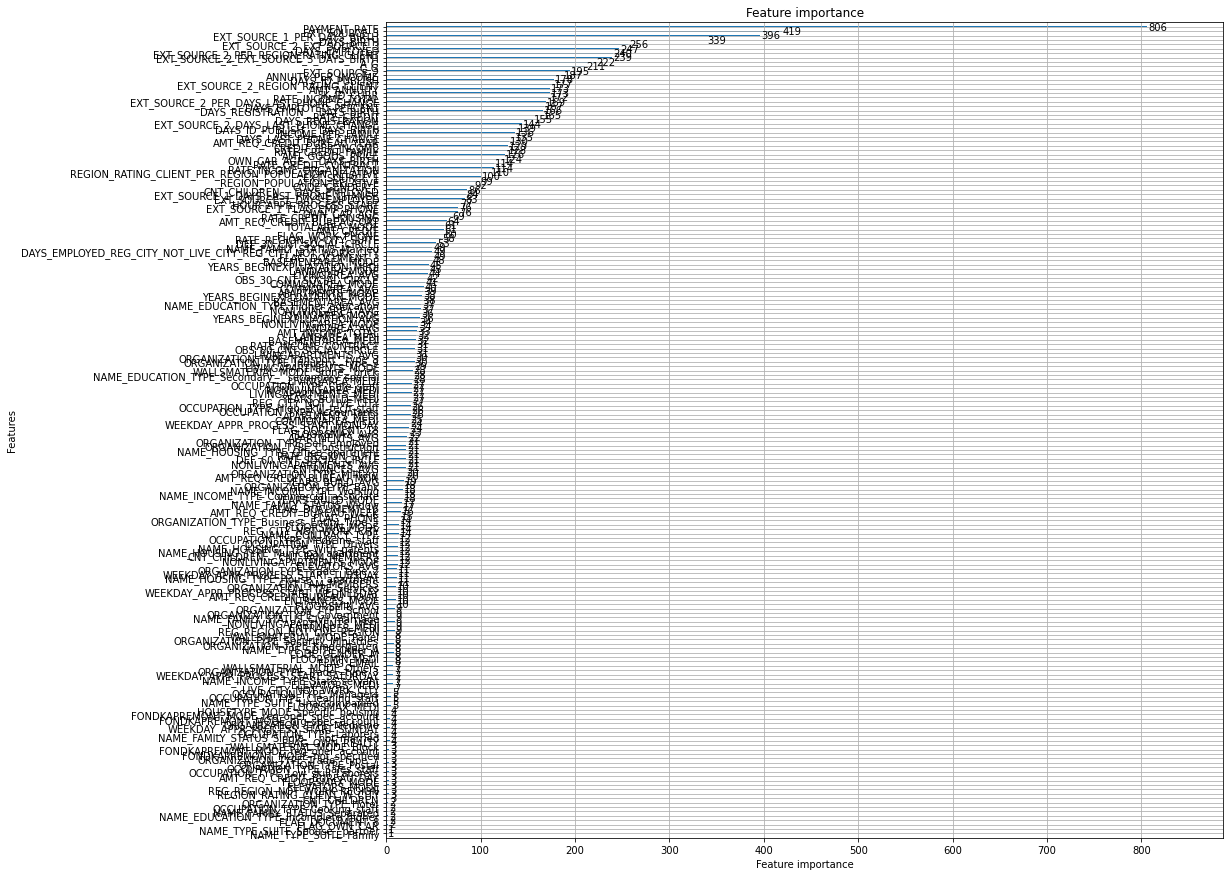

0.7676915906737759


In [24]:
#5分割交差検証
kf = KFold(n_splits=5, shuffle=True, random_state=71)

scores = []

for tr_idx, va_idx in kf.split(X):
    X_train, X_val = X.iloc[tr_idx], X.iloc[va_idx]
    y_train, y_val = y.iloc[tr_idx], y.iloc[va_idx]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    lgbm_params = {
        # 二値分類問題
        'objective': 'binary',
        # AUC の最大化を目指す
        'metric': 'auc',
        'learning_rate': 0.03950108314757622,
        'max_bin': 300,
        'max_depth': 8,
        'num_leaves': 20,
        'colsample_bytree': 0.9040000595576059,
        'reg_alpha': 0.03983607378840796,
        'reg_lambda': 0.07189855481306354,
        'min_split_gain': 0.027194989716137527,
        'min_child_weight':38,

    }
    
    #LightGBMで学習
    model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=1500, early_stopping_rounds=200, verbose_eval=-1)

    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
    auc = metrics.auc(fpr, tpr)
    scores.append(auc)
    
# 特徴量の重要度をプロットする
lgb.plot_importance(model, figsize=(15, 15))
plt.show()

print(np.mean(scores))

In [25]:
#予測
predictions = model.predict(X_test)
SK_ID_CURR = X_test['SK_ID_CURR']

#IDと予測結果の結合
Submission = pd.DataFrame({ 'SK_ID_CURR': SK_ID_CURR,'PREDICT': predictions})
Submission['TARGET'] = y_test

#収益性算出のために、返済額と住宅価格の項を追加
Submission['AMT_CREDIT'] = X_test['AMT_CREDIT']
Submission['AMT_GOODS_PRICE'] = X_test['AMT_GOODS_PRICE']

In [26]:
Submission.head(15)

,SK_ID_CURR,PREDICT,TARGET,AMT_CREDIT,AMT_GOODS_PRICE
89363,203749,0.354088,0,545040.0,450000.0
2544,102966,0.048228,0,1082214.0,945000.0
99817,215876,0.148220,0,454500.0,454500.0
205186,337851,0.105036,0,270000.0,270000.0
145435,268639,0.008079,0,239850.0,225000.0
300410,448036,0.101818,0,269550.0,225000.0
107534,224754,0.133633,1,338832.0,292500.0
44746,151829,0.014016,0,157914.0,139500.0
1324,101556,0.005917,0,706410.0,679500.0
272687,416113,0.131165,0,486000.0,486000.0


In [35]:
#閾値に伴う利益の変化
threshold = np.arange(0, 1, 0.01)
gain_list = []
for i in threshold:
    Submission['PREDICT_BINARY'] = 0
    Submission.loc[Submission['PREDICT'] > i, 'PREDICT_BINARY'] = 1
    
    Submission['TP'] = 0
    Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 1)), 'TP'] = 1
    
    Submission['FP'] = 0
    Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 1)), 'FP'] = 1
    
    Submission['TN'] = 0
    Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 0)), 'TN'] = 1
    
    Submission['FN'] = 0
    Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 0)), 'FN'] = 1
    
    Sub_0 = Submission[Submission['TN'] == 1]
    Sub_1 = Submission[Submission['FN'] == 1]
    
    Sub_0['margin'] = Sub_0['AMT_CREDIT'] - Sub_0['AMT_GOODS_PRICE']
    
    profit_sub = Sub_0['margin'].sum()
    
    loss_sub = Sub_1['AMT_CREDIT'].sum()
    
    gain_sub = profit_sub - loss_sub
    gain_list.append(gain_sub)

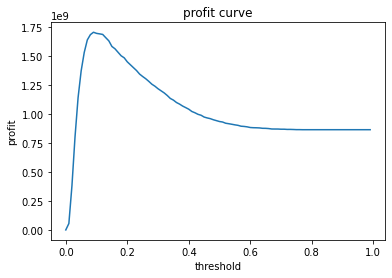

In [37]:
#利益曲線
plt.plot(threshold, gain_list)
plt.title("profit curve")
plt.xlabel("threshold")
plt.ylabel("profit")
plt.show()

In [38]:
#利益最大となる閾値
print(threshold[np.argmax(gain_list)])

0.09


In [39]:
#確率が閾値を超えた場合に陽性判定する
Submission['PREDICT_BINARY'] = 0
Submission.loc[Submission['PREDICT'] > 0.09, 'PREDICT_BINARY'] = 1
Submission.head(15)

,SK_ID_CURR,PREDICT,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,PREDICT_BINARY,TP,FP,TN,FN
89363,203749,0.354088,0,545040.0,450000.0,1,0,0,1,0
2544,102966,0.048228,0,1082214.0,945000.0,0,0,0,1,0
99817,215876,0.148220,0,454500.0,454500.0,1,0,0,1,0
205186,337851,0.105036,0,270000.0,270000.0,1,0,0,1,0
145435,268639,0.008079,0,239850.0,225000.0,0,0,0,1,0
300410,448036,0.101818,0,269550.0,225000.0,1,0,0,1,0
107534,224754,0.133633,1,338832.0,292500.0,1,0,0,0,1
44746,151829,0.014016,0,157914.0,139500.0,0,0,0,1,0
1324,101556,0.005917,0,706410.0,679500.0,0,0,0,1,0
272687,416113,0.131165,0,486000.0,486000.0,1,0,0,1,0


In [40]:
#真陽性、偽陽性、真陰性、偽陰性
Submission['TP'] = 0
Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 1)), 'TP'] = 1

Submission['FP'] = 0
Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 1)), 'FP'] = 1

Submission['TN'] = 0
Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 0)), 'TN'] = 1

Submission['FN'] = 0
Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 0)), 'FN'] = 1

Submission.head(15)

,SK_ID_CURR,PREDICT,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,PREDICT_BINARY,TP,FP,TN,FN
89363,203749,0.354088,0,545040.0,450000.0,1,0,1,0,0
2544,102966,0.048228,0,1082214.0,945000.0,0,0,0,1,0
99817,215876,0.148220,0,454500.0,454500.0,1,0,1,0,0
205186,337851,0.105036,0,270000.0,270000.0,1,0,1,0,0
145435,268639,0.008079,0,239850.0,225000.0,0,0,0,1,0
300410,448036,0.101818,0,269550.0,225000.0,1,0,1,0,0
107534,224754,0.133633,1,338832.0,292500.0,1,1,0,0,0
44746,151829,0.014016,0,157914.0,139500.0,0,0,0,1,0
1324,101556,0.005917,0,706410.0,679500.0,0,0,0,1,0
272687,416113,0.131165,0,486000.0,486000.0,1,0,1,0,0


In [41]:
#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Submission['TARGET'], Submission['PREDICT_BINARY'])
print(cm)

[[53142 17551]
 [ 2196  3917]]


In [42]:
#True Positive Rate
TPR = cm[1][1] / (cm[1][1] + cm[1][0])
print(TPR)

0.6407655815475217


In [43]:
#False Positive Rate
FPR = cm[0][1] / (cm[0][1] + cm[0][0])
print(FPR)

0.2482706915819105


In [44]:
#TN：融資して返済もされる(利益)
#FN：融資するが返済されない(コスト)
Sub_0 = Submission[Submission['TN'] == 1]
Sub_1 = Submission[Submission['FN'] == 1]

#利益 = 返済額 - 住宅価格
Sub_0['margin'] = Sub_0['AMT_CREDIT'] - Sub_0['AMT_GOODS_PRICE']
profit_sub = Sub_0['margin'].sum()
print(profit_sub)

#FNによるデフォルトコスト
loss_sub = Sub_1['AMT_CREDIT'].sum()
print(loss_sub)

#収益 = (返済額 - 住宅価格) - デフォルトコスト
gain_sub = profit_sub - loss_sub
print(gain_sub)

3026535489.0
1321900722.0
1704634767.0


In [45]:
#一人当たり収益
print(gain_sub / (Sub_0.shape[0] + Sub_1.shape[0]))

30804.054483356824


In [47]:
print(Sub_0.shape[0] + Sub_1.shape[0])

55338


# 収益性について

もともと307221人の顧客に融資し、一人当たり利益は10288ドルだった。

機械学習によりデフォルト確率の低い55338人に融資することで、結果として一人当たり利益を約3倍の30804ドルに増やすことができた。

これを元に新事業の提案を行った。具体的な内容はリンク先のスライドを見て頂きたい。
https://www.slideshare.net/KitadaAtsuya/gci-238455344